In [ ]:
customer segmentation: Segment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("Mall_customers.csv")

# Exploratory Analysis

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data is really clean there isnt any cleaning needed here

In [5]:
# We will check for the statistics analysis now
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


we can see that the average age here is 38, annual income is 60k dollar and the average spending score is 50, hihest age is 70 and lowest age is 18, maximum income is 137k dollar and the lowest income is 15k dollar,highest spending score is 99 and lowest spending sore is 1

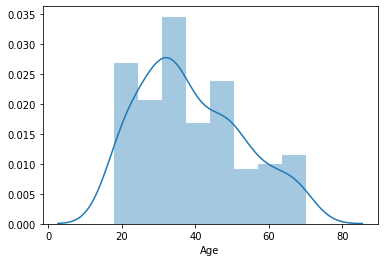

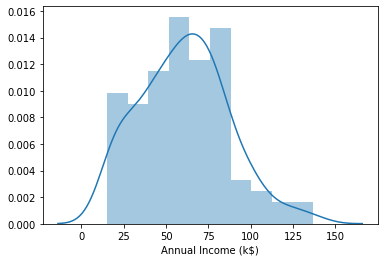

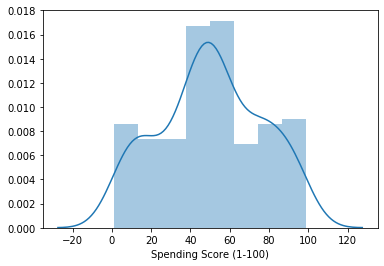

In [6]:
# create a histogram to look at the annual income and spending score 
column = ['Age','Annual Income (k$)','Spending Score (1-100)' ]
for i in column:
    plt.show()
    sns.distplot(df[i])

We can see that all 3 parameters are have normal distribution with age been concentrated around 40-60
essence for this plot is to see where the probability of the data will lie when sampling

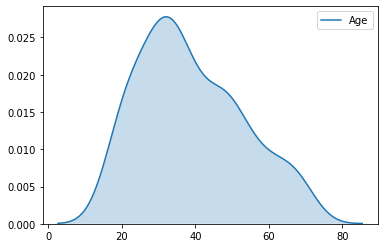

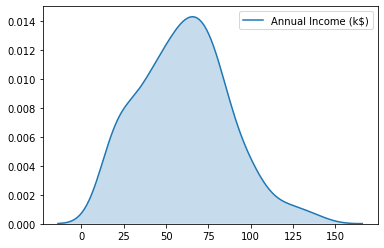

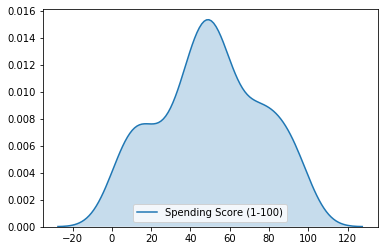

In [7]:
column = ['Age','Annual Income (k$)','Spending Score (1-100)' ]
for i in column:
    plt.figure()
    sns.kdeplot(df[i], shade = True)

Essence for this plot is to see where the probability of the data will lie when sampling

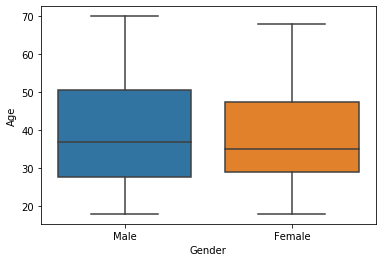

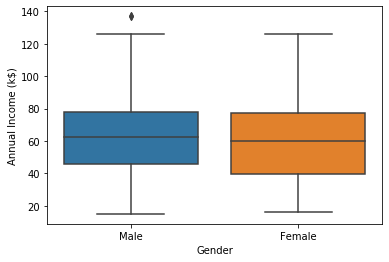

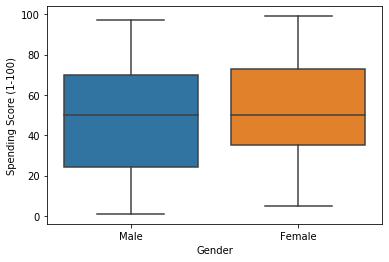

In [8]:
# using boxplot 
for i in column:
    plt.show()
    sns.boxplot(data = df, x="Gender", y=df[i])

from the boxplot, we can see that the age for the male is mostly concentrated around 27 and 50 and for the female between 30 and 45, no outliers with the age. 
for the annual income, we can see that there is an outlier with the annual income, one earning above the range. even though we had the same median with the spending score, there is much more data for the male than the female and yet the female has a higher spending score. 

One the we can be sure of is that there more female than male in our data. This can be shown below 


In [9]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# Bivariate analysis

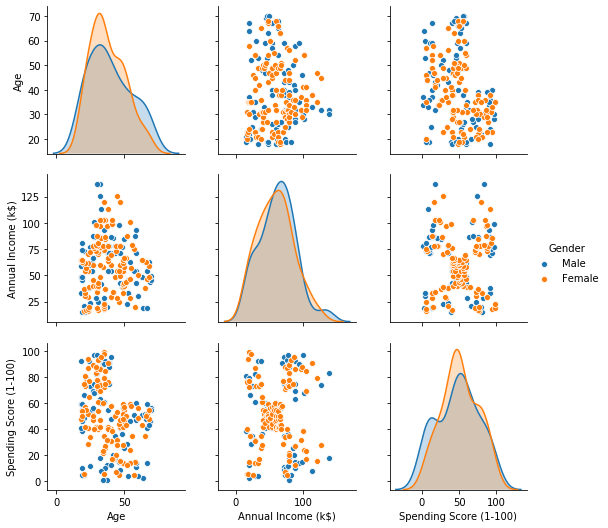

In [10]:
# we drop the customer ID cause it is of no use here
df = df.drop("CustomerID", axis = 1 )
# plotting a pairplot to give an overview
sns.pairplot(data = df, hue = "Gender")

we can see that the annual income and spending score have a well defined clusters comparing to the other ones which is not that well defined, so we take a look at the annual income and spending score 

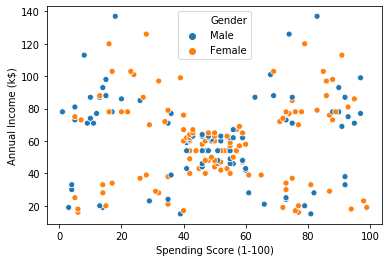

In [11]:
sns.scatterplot(data = df, y = 'Annual Income (k$)', x = 'Spending Score (1-100)', hue = "Gender")

from this graph we can say there are about five to six clusters 

In [12]:
#Next we want see the mean value by Gender
df.groupby("Gender").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
df.groupby("Gender")["Annual Income (k$)"].sum()

Gender
Female    6636
Male      5476
Name: Annual Income (k$), dtype: int64

here we can see that the annual income of the female is higher than the income of the male, yet the average income of the male is higer than the female, this is because perhaps the number of female is greater than the number of male

In [14]:
df.groupby("Gender")["Spending Score (1-100)"].sum()

Gender
Female    5771
Male      4269
Name: Spending Score (1-100), dtype: int64

In [15]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


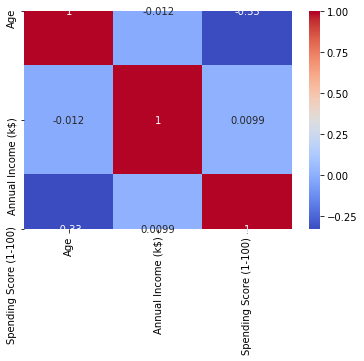

In [16]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm" );

# Clustering

In [17]:
# initiate the model
clustering1 = KMeans(random_state = 0)

In [18]:
# fit the model
# we want to fit on the annual income only for now
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
# check how many cluster labels we have
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7,
       7, 7])

we can see we have about 8 clusters which is from the default

# Clustering (Univariate, Bivariate and multivariate)

## univarite Clustering

In [20]:
# add the clusters to our dataframe
df["income clusters"] = clustering1.labels_

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income clusters
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [22]:
# Now we want to do a summary statistics around the univariate clusters
# first we want to see how many customers fall into those clusters
df["income clusters"].value_counts()

1    42
6    36
0    32
3    28
4    26
5    16
2    14
7     6
Name: income clusters, dtype: int64

 we can see cluster 7 has the highest number of customers while cluster 1 has the lowest number of customer
Although right now we have the standard clusters which is 8 (by default), but we can pass in the right amount of clusters using the elbow method to determine the number of clusters, also we will use a success method called intertia and the inertia gives us the distance from the centroid

In [23]:
clustering1.inertia_

2822.4996947496948

so we now create an efficient way to see each one of this clusters from the centroid to see when we should actually start our number of clusters


In [24]:
inertia_score = []
for i in range(1,11):
    kmean = KMeans(n_clusters = i, random_state = 0)
    kmean.fit(df[["Annual Income (k$)"]])
    inertia_score.append(kmean.inertia_)
    

In [25]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 23517.33093093093,
 13278.112713472487,
 8481.496190476191,
 5050.9047619047615,
 3941.416361416361,
 2822.4996947496948,
 2189.2563714063717,
 1734.167748917749]

this are all the inertia(distance from the centroid) scores for all the clusters

Now we create a plot to get the elbow and use it as our number of clusters 

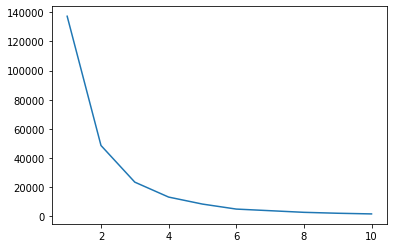

In [26]:
plt.plot(range(1,11), inertia_score)

From the above graph, we can see that the elbow start at 3

Now we use 3 as our number of clusters

In [27]:
clustering1 = KMeans(n_clusters = 3, random_state = 0)

In [28]:
# fit the model
# we want to fit on the annual income only for now
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [29]:
# check how many cluster labels we have
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [30]:
df["income clusters"] = clustering1.labels_

In [31]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income clusters
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,0
197,Male,32,126,74,0
198,Male,32,137,18,0


In [32]:
# check the number of data in each clusters
df["income clusters"].value_counts()

1    90
2    74
0    36
Name: income clusters, dtype: int64

we can see that cluster 1 has the highest number and clsuter 0 has the lowest number

In [33]:
# check the mean of the clusters on the age, annual income and spending score
df.groupby("income clusters").mean()

,Age,Annual Income (k$),Spending Score (1-100)
income clusters,,,
0,37.833333,99.888889,50.638889
1,38.722222,67.088889,50.000000
2,39.500000,33.486486,50.229730





## Now we will take a look at our Bivariate analysis to see the relationship bewtween annual income and the spending score

In [34]:
clustering2 = KMeans(random_state = 0)

In [35]:
clustering2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [36]:
df["income_spendingscore"] = clustering2.labels_

In [37]:
inertia_score2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i, random_state = 0)
    kmeans2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
    inertia_score2.append(kmeans2.inertia_)
    

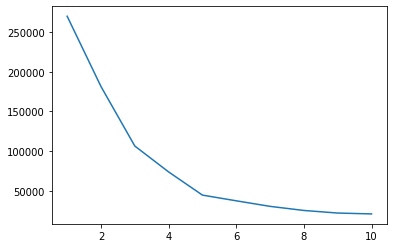

In [38]:
# plot the graph
plt.plot(range(1,11), inertia_score2)

here we can see that the elbow start at 5 and so we pass in the number of clusters as 5 in the new model

In [39]:
clustering2 = KMeans(n_clusters = 5, random_state = 0)
clustering2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
df["income_spendingscore"] = clustering2.labels_
df["income_spendingscore"].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: income_spendingscore, dtype: int64

In [40]:
df.groupby("income_spendingscore").mean()

,Age,Annual Income (k$),Spending Score (1-100),income clusters
income_spendingscore,,,,
0,41.114286,88.200000,17.114286,0.485714
1,42.716049,55.296296,49.518519,1.358025
2,32.692308,86.538462,82.128205,0.538462
3,25.272727,25.727273,79.363636,2.000000
4,45.217391,26.304348,20.913043,2.000000


In [41]:
# we make cneters to see the centers of the clusters
centers = pd.DataFrame(clustering2.cluster_centers_ )
centers.columns = ("x", "y")
centers

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


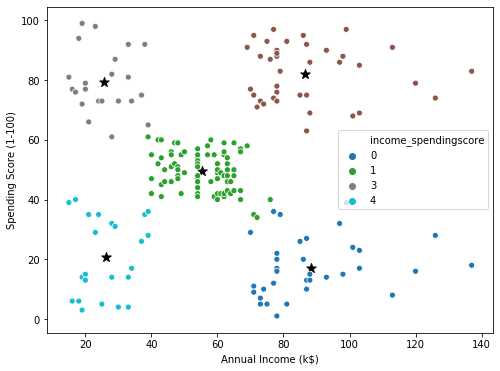

In [68]:
plt.figure(figsize = (8, 6 ))
plt.scatter(x = centers["x"], y = centers["y"], s = 100, color = "black", marker = "*")
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "income_spendingscore" , palette = "tab10")
#plt.savefig("bivariate clustering.png")

now we will do some further analysis to see which cluster has more spending score and which we should focus on

In [43]:
pd.crosstab(df["income_spendingscore"], df["Gender"], normalize = True)

Gender,Female,Male
income_spendingscore,,
0,0.080,0.095
1,0.240,0.165
2,0.105,0.090
3,0.065,0.045
4,0.070,0.045


In [44]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income clusters', 'income_spendingscore'],
      dtype='object')

so from this analysis cluster 2 will be our target cluster for the income and spending, it is the cluster that it is going to bring us sales and money and it is also dominated by female, maybe we can consider cluster 1 as well perhaps as both male and female have a good spending compare to others

In [45]:
# now we will chek for the age group clusters
df.groupby("income_spendingscore")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income_spendingscore,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


so from here, the age group we should focus our campaign on is Age 32 which is also in cluster 2, this cluster has an average annual income of 86 and a high spending score even though it is not the cluster with the highest average income. Cluster 3 also has a good average spending score 79 with a very low  average annual income, we can arguably also consder cluster 1 

# Multivariat clustering
Although the bivariat clustering has done exactly what we wan already, we want just do some multivariat clustering to hel with confirmation

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# get dummies for the gender
ndf = pd.get_dummies(df, drop_first = True)

In [48]:
ndf.drop(['income clusters', 'income_spendingscore'],axis = 1,  inplace = True)

In [49]:
ndf

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [50]:
# scale to help  equal scaling for the algorithm
scale = StandardScaler()

In [51]:
sndf = scale.fit_transform(ndf)

In [52]:
# turn the new scaled to a dataframe
sndf = pd.DataFrame(ndf)

In [53]:
# rename the columns
sndf.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_male']

In [54]:
sndf

,Age,Annual Income (k$),Spending Score (1-100),Gender_male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [55]:
inertia_score3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i, random_state = 0)
    kmeans3.fit(sndf)
    inertia_score3.append(kmeans3.inertia_)
  

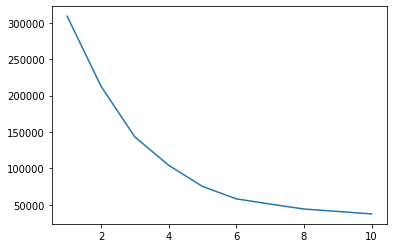

In [56]:
# plot the graph
plt.plot(range(1,11), inertia_score3)

let say our elbow starts at 4 cause the curve is a bit smooth though. 

So now we use 4 to create our multivariate clusters

In [57]:
cluster3 = KMeans(n_clusters = 4, random_state = 0)

In [58]:
cluster3.fit(ndf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [59]:
ndf["multivarite clusters"] = cluster3.labels_

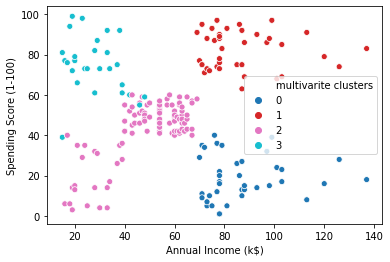

In [60]:
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = ndf , hue = "multivarite clusters", palette = "tab10")

In [61]:
ndf.groupby("multivarite clusters").mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_male
multivarite clusters,,,,
0,40.394737,87.000000,18.631579,0.526316
1,32.692308,86.538462,82.128205,0.461538
2,44.894737,48.705263,42.631579,0.378947
3,24.821429,28.714286,74.250000,0.500000


we can see even here it shows that cluster 1 which is the same as cluster 2 in the bivariate analysis and the same age group has the highest spending score, cluster 0 has the highest average income salary even though they have low spending score, this makes them a target market. 

In [64]:
pd.crosstab(ndf["multivarite clusters"],ndf["Gender_male"], normalize = True)

Gender_male,0,1
multivarite clusters,,
0,0.090,0.10
1,0.105,0.09
2,0.295,0.18
3,0.070,0.07


so, we can finally say that our focus customers or customers who spend more for us are in clsuter 1 for the male and cluster 2 for the female